## Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.fftpack import dct

## Read a WAV file

In [2]:
# Read WAV file
fs, signal = wavfile.read(r"C:\Users\raman\Downloads\sample_realistic_speech.wav")

# If stereo, convert to mono
if signal.ndim == 2:
    signal = np.mean(signal, axis=1)

# Convert to float and normalize
signal = signal.astype(np.float32)
signal = signal / np.max(np.abs(signal))

fs, signal.shape


(16000, (80000,))

## Analog Signal vs Digital Signal

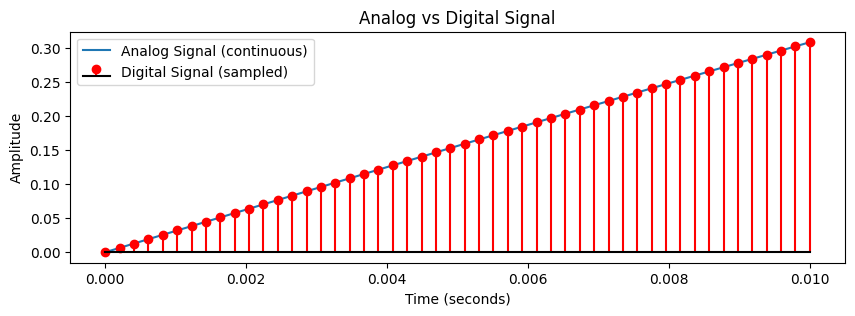

In [5]:
# Simulated analog signal (very high resolution)
t_analog = np.linspace(0, 0.01, 10000)   # 10 ms
analog_signal = np.sin(2 * np.pi * 5 * t_analog)

# Digital signal (sampled version)
t_digital = np.linspace(0, 0.01, 50)     # low number of samples
digital_signal = np.sin(2 * np.pi * 5 * t_digital)

# Plot
plt.figure(figsize=(10, 3))
plt.plot(t_analog, analog_signal, label="Analog Signal (continuous)")
plt.stem(t_digital, digital_signal,
         linefmt='r-', markerfmt='ro', basefmt='k',
         label="Digital Signal (sampled)")
plt.legend()
plt.title("Analog vs Digital Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## Frequency

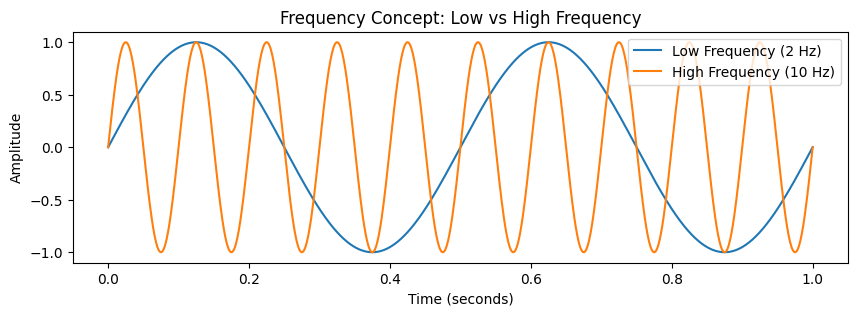

In [6]:
# Time axis
t = np.linspace(0, 1, 1000)

# Low frequency signal
low_freq_signal = np.sin(2 * np.pi * 2 * t)   # 2 Hz

# High frequency signal
high_freq_signal = np.sin(2 * np.pi * 10 * t) # 10 Hz

# Plot
plt.figure(figsize=(10, 3))
plt.plot(t, low_freq_signal, label="Low Frequency (2 Hz)")
plt.plot(t, high_freq_signal, label="High Frequency (10 Hz)")
plt.legend()
plt.title("Frequency Concept: Low vs High Frequency")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## Sine Wave

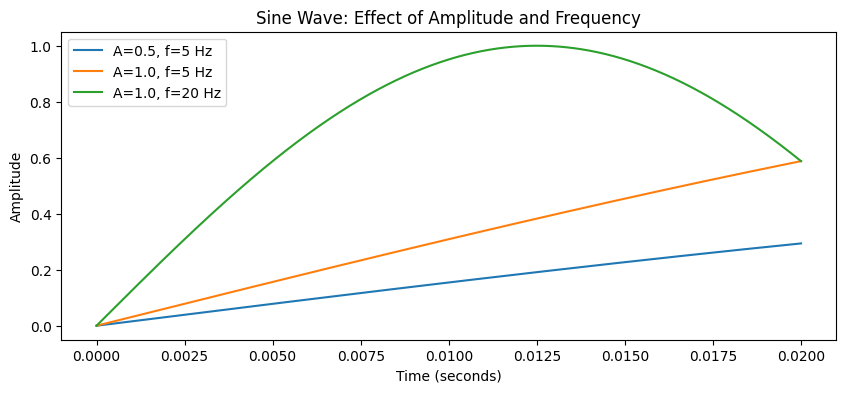

In [7]:
# Time axis (short duration)
t = np.linspace(0, 0.02, 1000)

# Sine waves with different amplitudes and frequencies
sine1 = 0.5 * np.sin(2 * np.pi * 5 * t)   # low amplitude, low frequency
sine2 = 1.0 * np.sin(2 * np.pi * 5 * t)   # high amplitude, same frequency
sine3 = 1.0 * np.sin(2 * np.pi * 20 * t)  # same amplitude, higher frequency

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t, sine1, label="A=0.5, f=5 Hz")
plt.plot(t, sine2, label="A=1.0, f=5 Hz")
plt.plot(t, sine3, label="A=1.0, f=20 Hz")
plt.legend()
plt.title("Sine Wave: Effect of Amplitude and Frequency")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


## Sampling

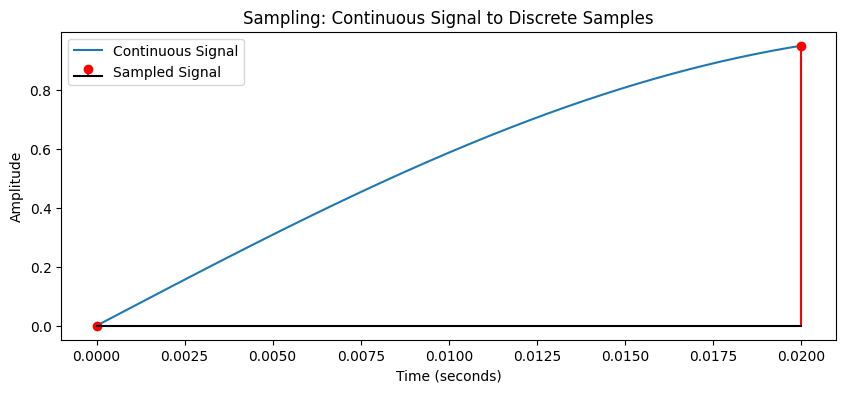

In [8]:
# Original continuous-time sine wave (high resolution)
t_cont = np.linspace(0, 0.02, 5000)
continuous_signal = np.sin(2 * np.pi * 10 * t_cont)

# Sampled signal (lower sampling rate)
fs_sampled = 100   # 100 samples per second
t_sampled = np.linspace(0, 0.02, int(fs_sampled * 0.02))
sampled_signal = np.sin(2 * np.pi * 10 * t_sampled)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t_cont, continuous_signal, label="Continuous Signal")
plt.stem(
    t_sampled,
    sampled_signal,
    linefmt='r-',
    markerfmt='ro',
    basefmt='k',
    label="Sampled Signal"
)
plt.legend()
plt.title("Sampling: Continuous Signal to Discrete Samples")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## Quantization (Discrete Amplitude Levels)

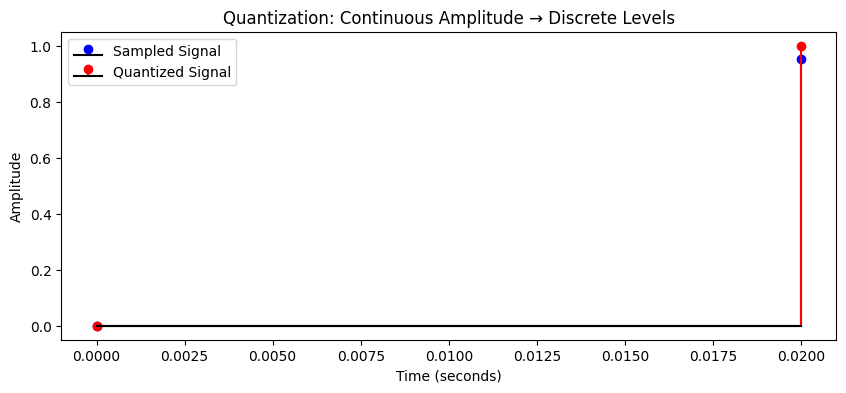

In [9]:
# Quantization parameters
levels = 8  # number of quantization levels

# Quantize the sampled signal
quantized_signal = np.round(sampled_signal * levels) / levels

# Plot sampled vs quantized
plt.figure(figsize=(10, 4))
plt.stem(
    t_sampled,
    sampled_signal,
    linefmt='b-',
    markerfmt='bo',
    basefmt='k',
    label="Sampled Signal"
)
plt.stem(
    t_sampled,
    quantized_signal,
    linefmt='r-',
    markerfmt='ro',
    basefmt='k',
    label="Quantized Signal"
)
plt.legend()
plt.title("Quantization: Continuous Amplitude → Discrete Levels")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## Time-Domain Signal

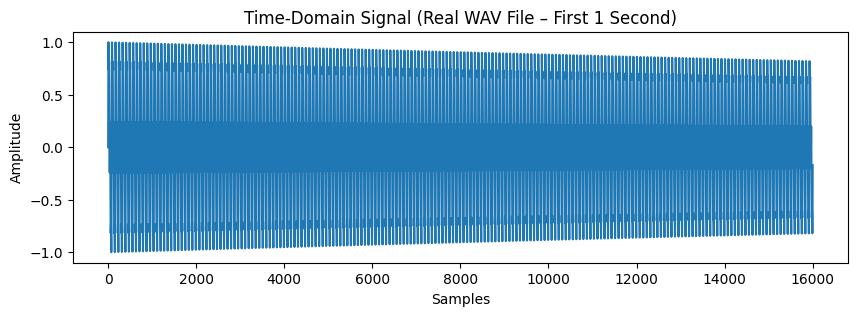

In [10]:
# Plot real WAV signal in time domain (first 1 second)
plt.figure(figsize=(10, 3))
plt.plot(signal[:fs])
plt.title("Time-Domain Signal (Real WAV File – First 1 Second)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()


## Fourier Transform

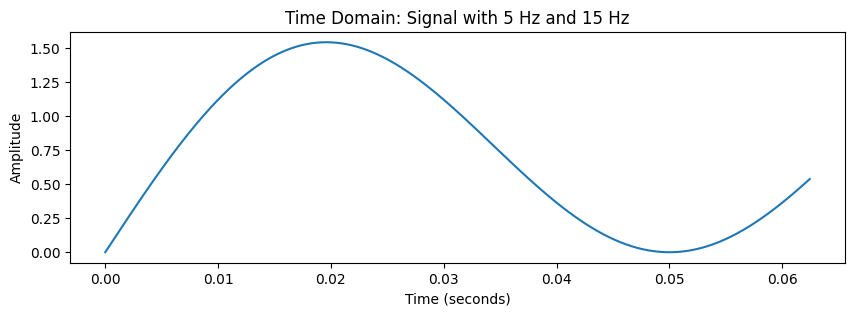

In [11]:
# Create a signal with two known frequencies
t = np.linspace(0, 1, fs)
signal_two_freq = np.sin(2 * np.pi * 5 * t) + np.sin(2 * np.pi * 15 * t)

# Plot in time domain
plt.figure(figsize=(10, 3))
plt.plot(t[:1000], signal_two_freq[:1000])
plt.title("Time Domain: Signal with 5 Hz and 15 Hz")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()

## FFT Spectrum (Actual Fourier Transform)

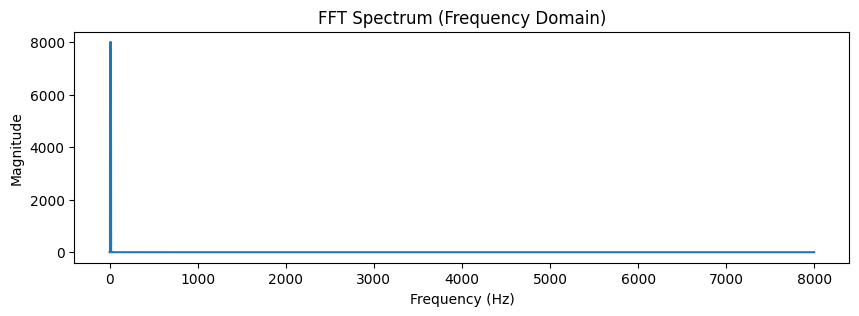

In [12]:
# FFT of the two-frequency signal
N = len(signal_two_freq)
fft_vals = np.fft.fft(signal_two_freq)
freqs = np.fft.fftfreq(N, 1/fs)

# Plot only positive frequencies
plt.figure(figsize=(10, 3))
plt.plot(freqs[:N//2], np.abs(fft_vals[:N//2]))
plt.title("FFT Spectrum (Frequency Domain)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

## Framing (Splitting signal into short frames)

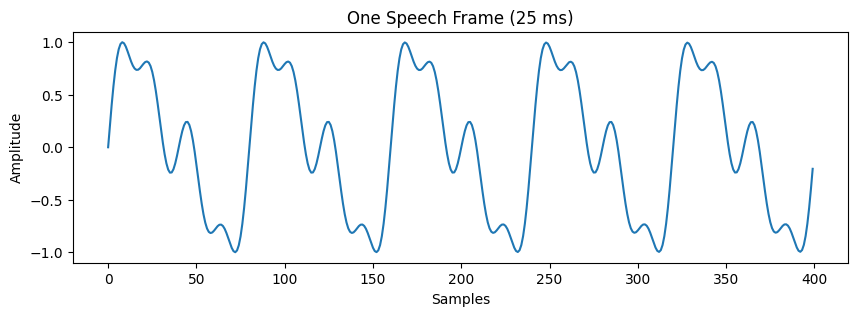

400

In [13]:
# Frame parameters
frame_size = 0.025   # 25 ms
frame_stride = 0.01  # 10 ms

frame_len = int(frame_size * fs)
frame_step = int(frame_stride * fs)

# Take only the first frame for visualization
frame = signal[:frame_len]

# Plot the frame
plt.figure(figsize=(10, 3))
plt.plot(frame)
plt.title("One Speech Frame (25 ms)")
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.show()

frame_len

## Hamming Window (Edge Smoothing)

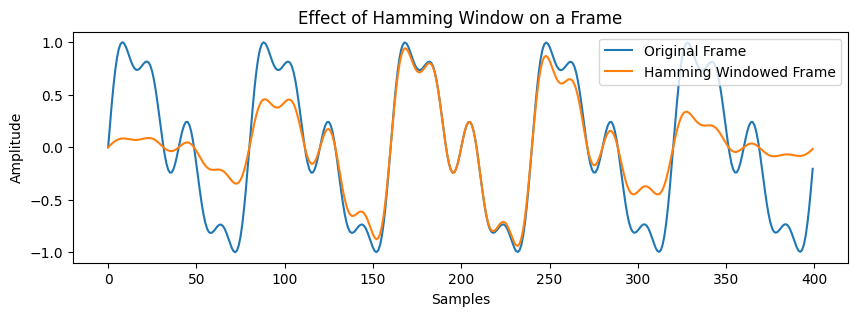

In [14]:
# Create Hamming window
hamming_window = np.hamming(frame_len)

# Apply window to the frame
windowed_frame = frame * hamming_window

# Plot original vs windowed frame
plt.figure(figsize=(10, 3))
plt.plot(frame, label="Original Frame")
plt.plot(windowed_frame, label="Hamming Windowed Frame")
plt.legend()
plt.xlabel("Samples")
plt.ylabel("Amplitude")
plt.title("Effect of Hamming Window on a Frame")
plt.show()

## FFT on Windowed Frame

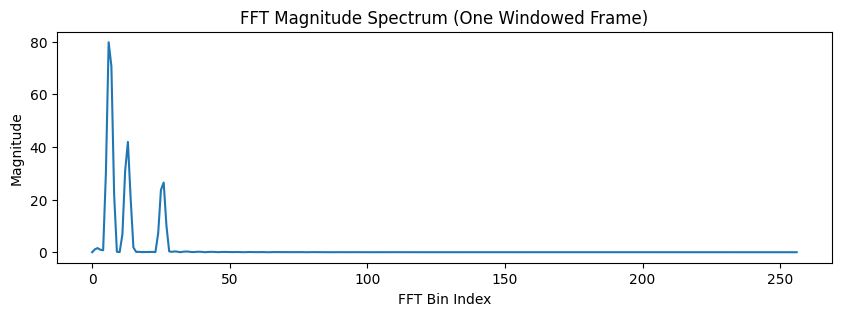

In [15]:
# Number of FFT points
NFFT = 512

# Apply FFT on windowed frame
fft_frame = np.fft.rfft(windowed_frame, NFFT)

# Magnitude spectrum
magnitude_spectrum = np.abs(fft_frame)

# Plot magnitude spectrum
plt.figure(figsize=(10, 3))
plt.plot(magnitude_spectrum)
plt.title("FFT Magnitude Spectrum (One Windowed Frame)")
plt.xlabel("FFT Bin Index")
plt.ylabel("Magnitude")
plt.show()

## Power Spectrum

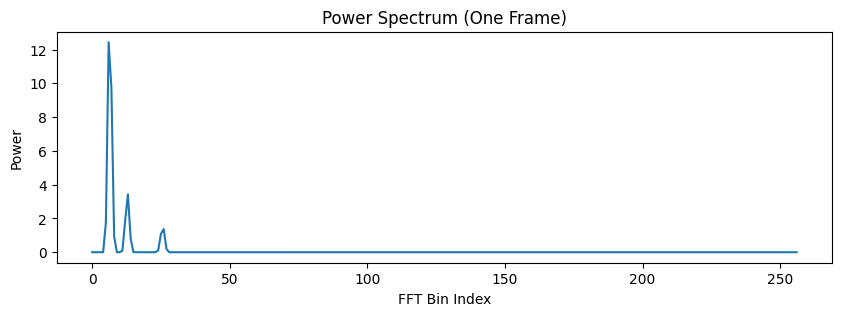

In [17]:
# Power spectrum
power_spectrum = (1.0 / NFFT) * (magnitude_spectrum ** 2)

# Plot power spectrum
plt.figure(figsize=(10, 3))
plt.plot(power_spectrum)
plt.title("Power Spectrum (One Frame)")
plt.xlabel("FFT Bin Index")
plt.ylabel("Power")
plt.show()

## Spectrogram (Time–Frequency Representation)

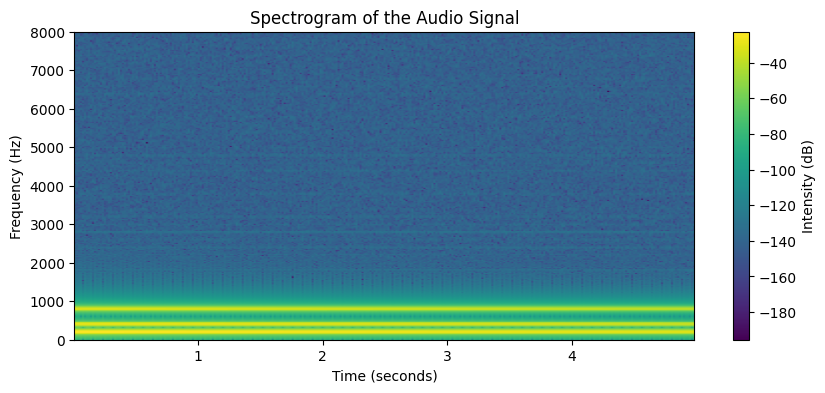

In [18]:
plt.figure(figsize=(10, 4))
plt.specgram(signal, Fs=fs, NFFT=512, noverlap=256)
plt.title("Spectrogram of the Audio Signal")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.colorbar(label="Intensity (dB)")
plt.show()

## Mel Scale (Hz → Mel Mapping)

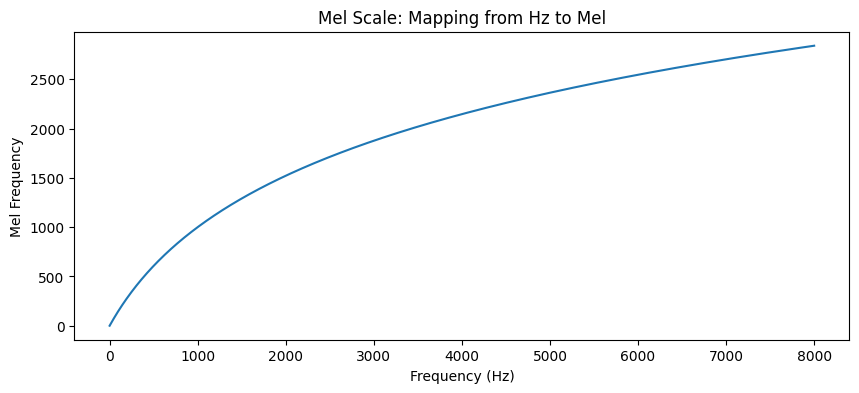

In [19]:
# Create frequency range (Hz)
hz = np.linspace(0, fs/2, 1000)

# Convert Hz to Mel
mel = 2595 * np.log10(1 + hz / 700)

# Plot Hz vs Mel
plt.figure(figsize=(10, 4))
plt.plot(hz, mel)
plt.title("Mel Scale: Mapping from Hz to Mel")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Mel Frequency")
plt.show()

## Mel Filter Banks

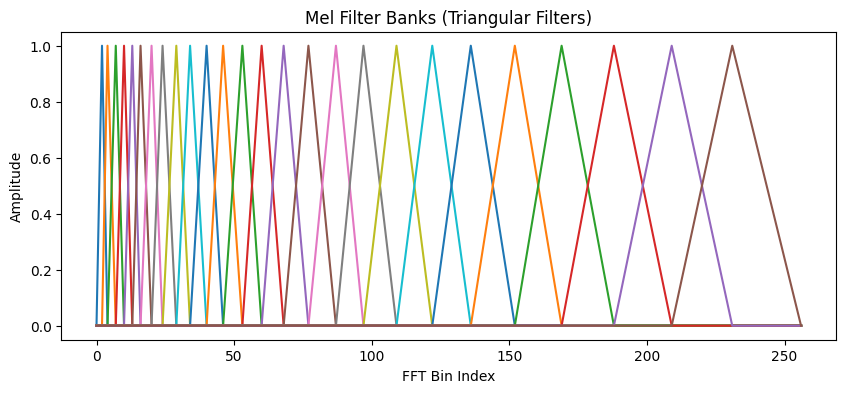

In [20]:
# Helper functions
def hz_to_mel(hz):
    return 2595 * np.log10(1 + hz / 700)

def mel_to_hz(mel):
    return 700 * (10**(mel / 2595) - 1)

# Parameters
num_filters = 26
low_freq = 0
high_freq = fs / 2

# Convert frequency range to Mel
low_mel = hz_to_mel(low_freq)
high_mel = hz_to_mel(high_freq)

# Equally spaced Mel points
mel_points = np.linspace(low_mel, high_mel, num_filters + 2)

# Convert Mel points back to Hz
hz_points = mel_to_hz(mel_points)

# Convert Hz to FFT bin numbers
bin_points = np.floor((NFFT + 1) * hz_points / fs).astype(int)

# Create filter bank matrix
filter_bank = np.zeros((num_filters, int(NFFT / 2 + 1)))

# Build triangular filters
for m in range(1, num_filters + 1):
    f_left = bin_points[m - 1]
    f_center = bin_points[m]
    f_right = bin_points[m + 1]

    for k in range(f_left, f_center):
        filter_bank[m - 1, k] = (k - f_left) / (f_center - f_left)
    for k in range(f_center, f_right):
        filter_bank[m - 1, k] = (f_right - k) / (f_right - f_center)

# Visualize Mel filter banks
plt.figure(figsize=(10, 4))
for i in range(num_filters):
    plt.plot(filter_bank[i])
plt.title("Mel Filter Banks (Triangular Filters)")
plt.xlabel("FFT Bin Index")
plt.ylabel("Amplitude")
plt.show()


## Log-Mel Energy

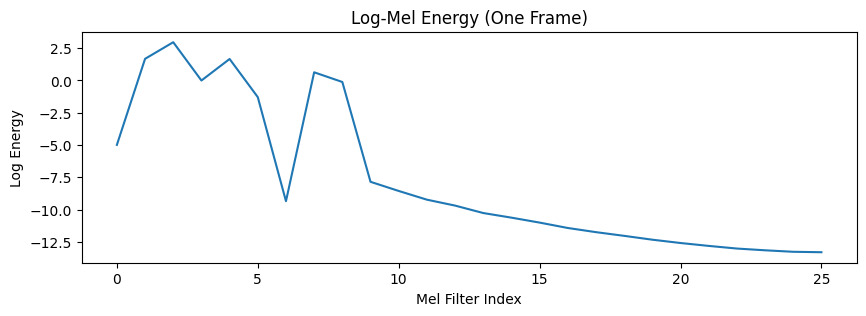

In [21]:
# Apply Mel filter banks to power spectrum
mel_energy = np.dot(power_spectrum, filter_bank.T)

# Numerical stability (avoid log(0))
mel_energy = np.where(mel_energy == 0, np.finfo(float).eps, mel_energy)

# Log-Mel energy
log_mel_energy = np.log(mel_energy)

# Plot Log-Mel energy
plt.figure(figsize=(10, 3))
plt.plot(log_mel_energy)
plt.title("Log-Mel Energy (One Frame)")
plt.xlabel("Mel Filter Index")
plt.ylabel("Log Energy")
plt.show()

## DCT (Discrete Cosine Transform)

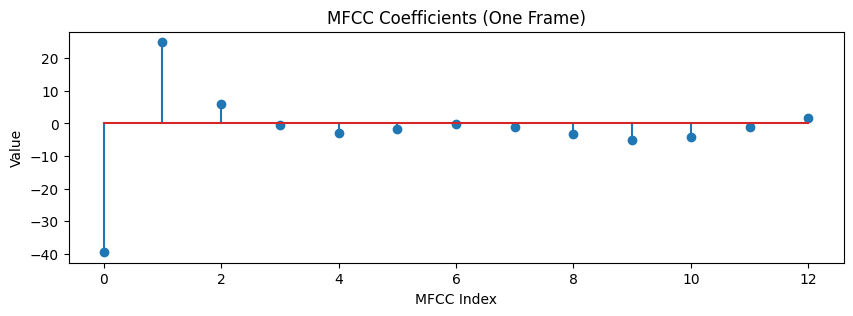

(13,)

In [23]:
# Number of MFCC coefficients to keep
num_mfcc = 13

# Apply DCT on Log-Mel energy
mfcc = dct(log_mel_energy, type=2, norm='ortho')[:num_mfcc]

# Plot MFCC coefficients for one frame
# Plot MFCC coefficients for one frame
plt.figure(figsize=(10, 3))
plt.stem(mfcc)
plt.title("MFCC Coefficients (One Frame)")
plt.xlabel("MFCC Index")
plt.ylabel("Value")
plt.show()

mfcc.shape

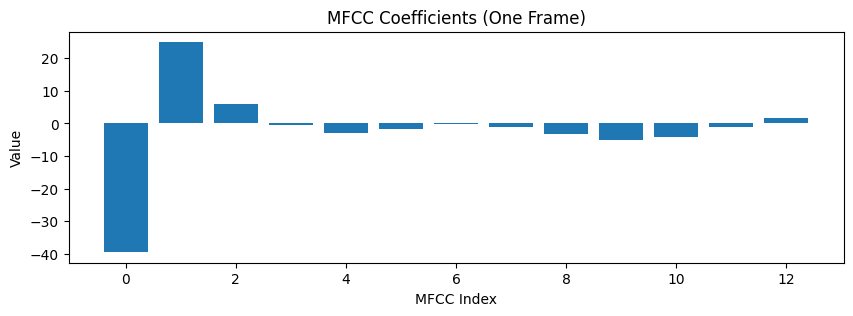

In [24]:
plt.figure(figsize=(10, 3))
plt.bar(range(len(mfcc)), mfcc)
plt.title("MFCC Coefficients (One Frame)")
plt.xlabel("MFCC Index")
plt.ylabel("Value")
plt.show()


## MFCC Normalization + Final Interpretation

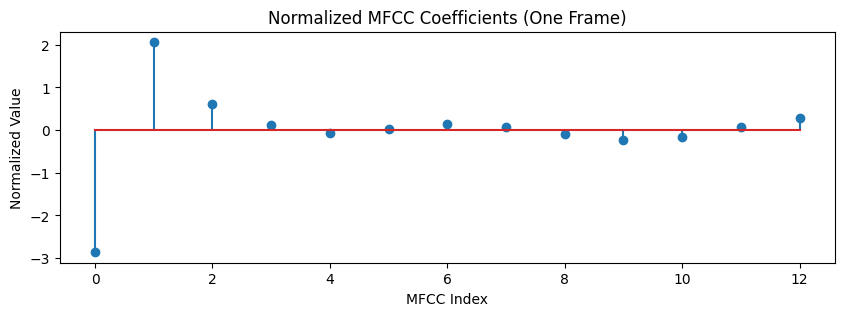

(13,)

In [25]:
# Mean and standard deviation
mfcc_mean = np.mean(mfcc)
mfcc_std = np.std(mfcc)

# Normalize MFCC
mfcc_normalized = (mfcc - mfcc_mean) / mfcc_std

# Plot normalized MFCC
plt.figure(figsize=(10, 3))
plt.stem(mfcc_normalized)
plt.title("Normalized MFCC Coefficients (One Frame)")
plt.xlabel("MFCC Index")
plt.ylabel("Normalized Value")
plt.show()

mfcc_normalized.shape